In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005104 entries, 0 to 1005103
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1005104 non-null  int64  
 1   Date Rptd       1005104 non-null  object 
 2   DATE OCC        1005104 non-null  object 
 3   TIME OCC        1005104 non-null  int64  
 4   AREA            1005104 non-null  int64  
 5   AREA NAME       1005104 non-null  object 
 6   Rpt Dist No     1005104 non-null  int64  
 7   Part 1-2        1005104 non-null  int64  
 8   Crm Cd          1005104 non-null  int64  
 9   Crm Cd Desc     1005104 non-null  object 
 10  Mocodes         853380 non-null   object 
 11  Vict Age        1005104 non-null  int64  
 12  Vict Sex        860353 non-null   object 
 13  Vict Descent    860341 non-null   object 
 14  Premis Cd       1005088 non-null  float64
 15  Premis Desc     1004516 non-null  object 
 16  Weapon Used Cd  327244 non-null   fl

In [4]:
df.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [5]:
df.isnull().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151724
Vict Age                0
Vict Sex           144751
Vict Descent       144763
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677860
Weapon Desc        677860
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           935958
Crm Cd 3          1002789
Crm Cd 4          1005040
LOCATION                0
Cross Street       850867
LAT                     0
LON                     0
dtype: int64

In [6]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON


# Data Processing (Replace null values)

In [7]:
df['Vict Sex'].unique()

array(['M', 'X', nan, 'F', 'H', '-'], dtype=object)

## M-male, F- Female, X-Unknown

In [8]:
df['Vict Sex'] = df['Vict Sex'].apply(lambda x: x if x in ['M', 'F'] else 'X')

In [9]:
df['Vict Sex'].unique()

array(['M', 'X', 'F'], dtype=object)

In [10]:
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')

In [11]:
df['Vict Descent'].unique()

array(['O', 'X', nan, 'W', 'H', 'B', 'A', 'K', 'C', 'F', 'Z', 'V', 'I',
       'P', 'J', 'G', 'U', 'D', 'S', 'L', '-'], dtype=object)

In [12]:
df['Vict Descent'] = df['Vict Descent'].replace({np.nan: 'X', '-': 'X'})
df['Vict Descent'].unique()

array(['O', 'X', 'W', 'H', 'B', 'A', 'K', 'C', 'F', 'Z', 'V', 'I', 'P',
       'J', 'G', 'U', 'D', 'S', 'L'], dtype=object)

In [13]:
df['Mocodes'].fillna("Unknown", inplace=True)
df['Premis Desc'].fillna("Unknown", inplace=True)
df['Weapon Desc'].fillna("Unknown", inplace=True)
df['Cross Street'].fillna("Unknown", inplace=True)

In [14]:
df['Premis Cd'].fillna(0.0, inplace=True)

In [15]:
df['Premis Cd'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1005104 entries, 0 to 1005103
Series name: Premis Cd
Non-Null Count    Dtype  
--------------    -----  
1005104 non-null  float64
dtypes: float64(1)
memory usage: 7.7 MB


In [16]:
df['Weapon Used Cd'].fillna(0, inplace=True)
df['Crm Cd 1'].fillna(0.0, inplace=True)
df['Crm Cd 2'].fillna(0.0, inplace=True)
df['Crm Cd 3'].fillna(0.0, inplace=True)
df['Crm Cd 4'].fillna(0.0, inplace=True)
df['Status'].fillna("Unknown", inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005104 entries, 0 to 1005103
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   DR_NO           1005104 non-null  int64         
 1   Date Rptd       1005104 non-null  datetime64[ns]
 2   DATE OCC        1005104 non-null  datetime64[ns]
 3   TIME OCC        1005104 non-null  int64         
 4   AREA            1005104 non-null  int64         
 5   AREA NAME       1005104 non-null  object        
 6   Rpt Dist No     1005104 non-null  int64         
 7   Part 1-2        1005104 non-null  int64         
 8   Crm Cd          1005104 non-null  int64         
 9   Crm Cd Desc     1005104 non-null  object        
 10  Mocodes         1005104 non-null  object        
 11  Vict Age        1005104 non-null  int64         
 12  Vict Sex        1005104 non-null  object        
 13  Vict Descent    1005104 non-null  object        
 14  Premis Cd       10

In [18]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON


In [19]:
df.isnull().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64

# Summary Statistics

In [20]:
# Display the first few rows
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,0.0,0.0,1900 S LONGWOOD AV,Unknown,34.0375,-118.3506
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,0.0,0.0,1000 S FLOWER ST,Unknown,34.0444,-118.2628
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,0.0,0.0,0.0,1400 W 37TH ST,Unknown,34.0210,-118.3002
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,0.0,0.0,0.0,14000 RIVERSIDE DR,Unknown,34.1576,-118.4387
4,200412582,2020-09-09,2020-09-09,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,0.0,0.0,0.0,200 E AVENUE 28,Unknown,34.0820,-118.2130


In [21]:
# General statistics of numerical columns
print(df.describe())

              DR_NO      TIME OCC          AREA   Rpt Dist No      Part 1-2  \
count  1.005104e+06  1.005104e+06  1.005104e+06  1.005104e+06  1.005104e+06   
mean   2.202253e+08  1.339912e+03  1.069102e+01  1.115561e+03  1.400287e+00   
std    1.319645e+07  6.510650e+02  6.110349e+00  6.111694e+02  4.899567e-01   
min    8.170000e+02  1.000000e+00  1.000000e+00  1.010000e+02  1.000000e+00   
25%    2.106169e+08  9.000000e+02  5.000000e+00  5.870000e+02  1.000000e+00   
50%    2.209160e+08  1.420000e+03  1.100000e+01  1.139000e+03  1.000000e+00   
75%    2.311104e+08  1.900000e+03  1.600000e+01  1.613000e+03  2.000000e+00   
max    2.521041e+08  2.359000e+03  2.100000e+01  2.199000e+03  2.000000e+00   

             Crm Cd      Vict Age     Premis Cd  Weapon Used Cd      Crm Cd 1  \
count  1.005104e+06  1.005104e+06  1.005104e+06    1.005104e+06  1.005104e+06   
mean   5.001423e+02  2.891422e+01  3.056089e+02    1.184954e+02  4.998975e+02   
std    2.052598e+02  2.199366e+01  2.193105e+

In [22]:
# Check unique values in categorical columns
print(df['Vict Sex'].value_counts())
print("--------------------------------------------------------------------------------------")
print(df['Vict Descent'].value_counts())
print("--------------------------------------------------------------------------------------")
print(df['Crm Cd Desc'].value_counts())

M    403889
F    358575
X    242640
Name: Vict Sex, dtype: int64
--------------------------------------------------------------------------------------
H    296406
X    251450
W    201447
B    135818
O     78002
A     21339
K      5991
F      4838
C      4631
J      1586
V      1195
I      1015
Z       577
P       288
U       221
D        91
L        77
G        74
S        58
Name: Vict Descent, dtype: int64
--------------------------------------------------------------------------------------
VEHICLE - STOLEN                                           115230
BATTERY - SIMPLE ASSAULT                                    74840
BURGLARY FROM VEHICLE                                       63517
THEFT OF IDENTITY                                           62539
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     61092
                                                            ...  
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)              5
FIREARMS RESTRAINING ORDER (FIREARMS R

# Crime Frequency Over Time

In [23]:
# Count of crimes per year
df['year'] = df['DATE OCC'].dt.year
crime_trend = df.groupby('year').size()

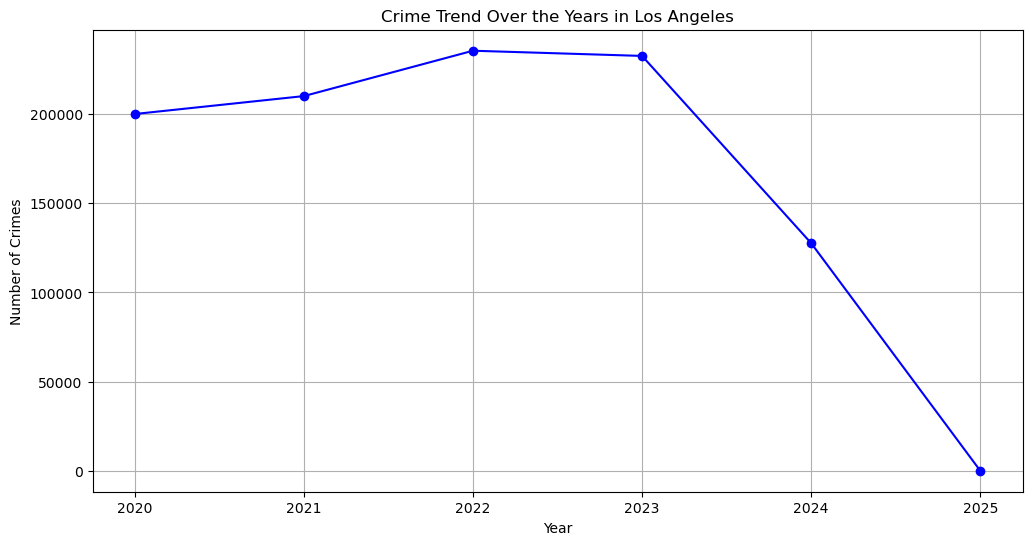

In [24]:
# Plot crime trends over the years
plt.figure(figsize=(12,6))
crime_trend.plot(kind='line', marker='o', color='b')
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.title("Crime Trend Over the Years in Los Angeles")
plt.grid()
plt.show()

# Most Common Types of Crimes
##  Top 10 most common crimes

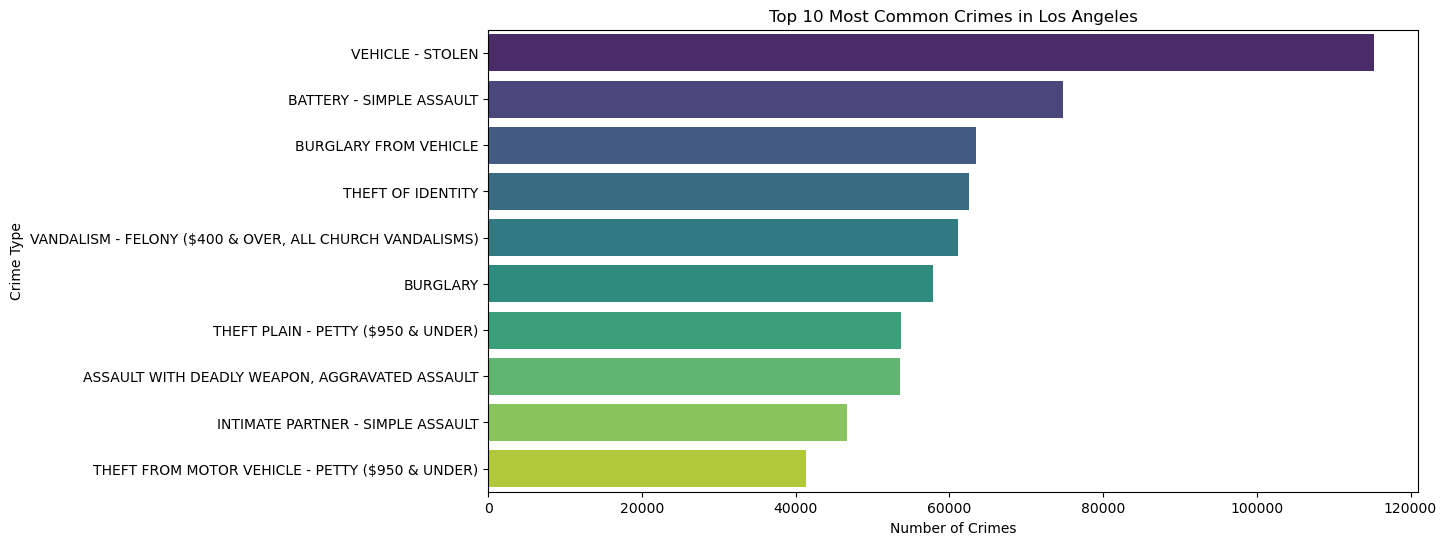

In [25]:
plt.figure(figsize=(12,6))
crime_counts = df['Crm Cd Desc'].value_counts().head(10)
sns.barplot(x=crime_counts.values, y=crime_counts.index, palette="viridis")
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Type")
plt.title("Top 10 Most Common Crimes in Los Angeles")
plt.show()

# Crime Distribution by Area
## Which areas report the most crimes?

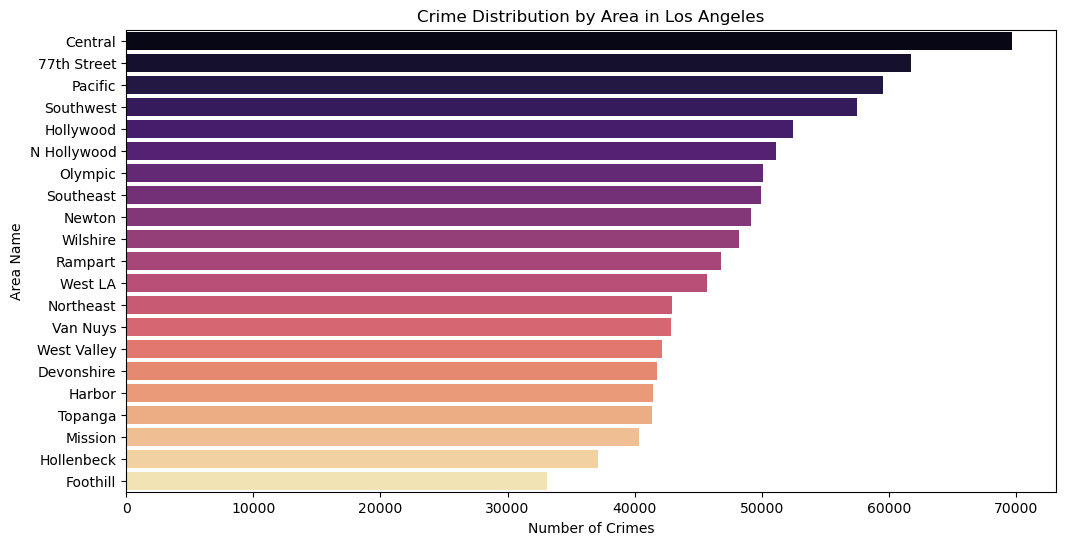

In [26]:
plt.figure(figsize=(12,6))
area_counts = df['AREA NAME'].value_counts()
sns.barplot(x=area_counts.values, y=area_counts.index, palette="magma")
plt.xlabel("Number of Crimes")
plt.ylabel("Area Name")
plt.title("Crime Distribution by Area in Los Angeles")
plt.show()

# Crime Heatmap (Geospatial Visualization)

In [27]:
# Function to assign colors based on crime type
def get_color(crime):
    if any(cr in crime for cr in ["HOMICIDE", "RAPE"]):
        return "red"
    elif any(cr in crime for cr in ["ROBBERY", "BURGLARY", "ASSAULT"]):
        return "orange"
    else:
        return "blue"

# Create a base map centered around Los Angeles
crime_map = folium.Map(location=[34.0522, -118.2437], zoom_start=11)

# Sample a subset of data (to avoid overcrowding)
sample_df = df[['LAT', 'LON', 'Crm Cd Desc']].dropna().sample(1000, random_state=42)

# Add scatter markers with color-coded severity
for _, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=3,
        color=get_color(row['Crm Cd Desc']),
        fill=True,
        fill_color=get_color(row['Crm Cd Desc']),
        fill_opacity=0.6,
        tooltip=row['Crm Cd Desc']
    ).add_to(crime_map)

# Save and display the map
# crime_map.save("crime_severity_map.html")
# print("Crime severity map saved as crime_severity_map.html")
crime_map

 # Crime Occurrence by Time of Day

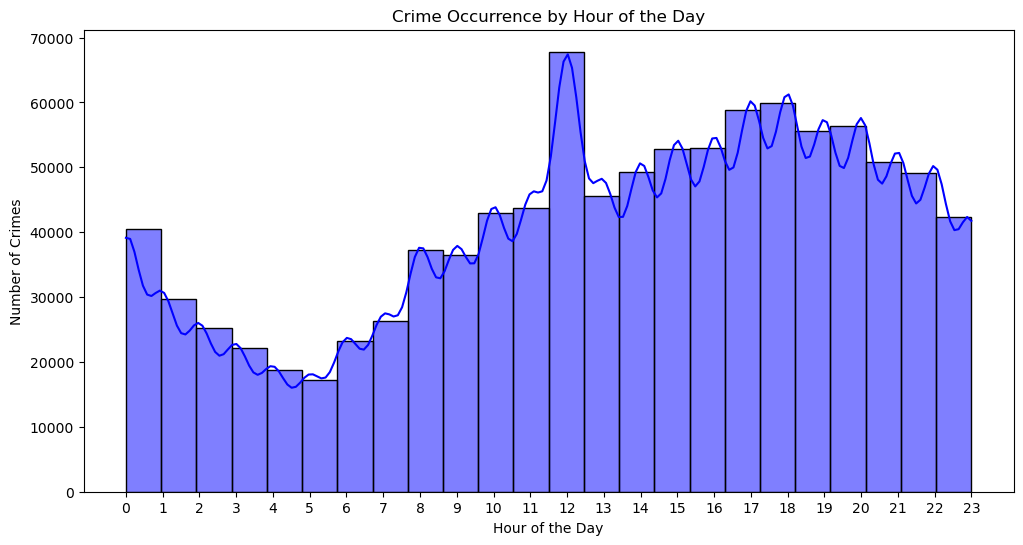

In [28]:
df['hour'] = df['TIME OCC'] // 100  # Convert military time to hour format

plt.figure(figsize=(12,6))
sns.histplot(df['hour'], bins=24, kde=True, color='blue')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Crimes")
plt.title("Crime Occurrence by Hour of the Day")
plt.xticks(range(0, 24))
plt.show()


# Crime Severity Analysis

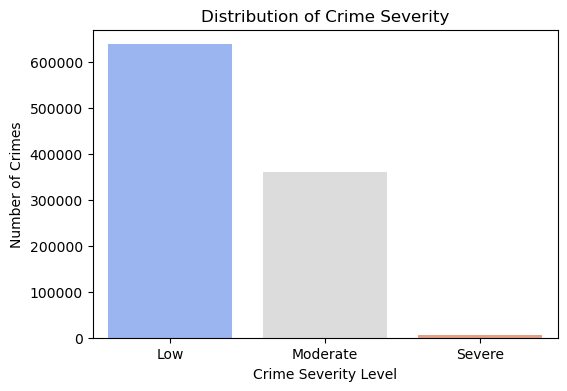

In [29]:
def categorize_crime(crime):
    if any(cr in crime for cr in ["HOMICIDE", "RAPE"]):
        return "Severe"
    elif any(cr in crime for cr in ["ROBBERY", "BURGLARY", "ASSAULT"]):
        return "Moderate"
    else:
        return "Low"

df['crime_severity'] = df['Crm Cd Desc'].apply(categorize_crime)

# Count of crime severity
plt.figure(figsize=(6,4))
sns.countplot(x=df['crime_severity'], palette="coolwarm")
plt.xlabel("Crime Severity Level")
plt.ylabel("Number of Crimes")
plt.title("Distribution of Crime Severity")
plt.show()

In [30]:
df_filtered = df[df['Vict Sex'].isin(['M', 'F'])]
weapon_analysis = df_filtered.groupby(['Vict Sex', 'Weapon Desc']).size().reset_index(name='Count')

In [31]:
weapon_analysis.head(5)

,Vict Sex,Weapon Desc,Count
0,F,AIR PISTOL/REVOLVER/RIFLE/BB GUN,557
1,F,ANTIQUE FIREARM,2
2,F,ASSAULT WEAPON/UZI/AK47/ETC,15
3,F,AUTOMATIC WEAPON/SUB-MACHINE GUN,7
4,F,AXE,83


In [32]:
weapon_analysis['Count'].unique()

array([   557,      2,     15,      7,     83,    356,      3,    467,
           60,     22,    799,      9,     11,     33,    118,      6,
          533,    251,     25,     13,     16,    162,    171,    551,
          119,    390,   4668,     38,    707,   1720,    457,     30,
            1,   1146,    266,    207,    215,   1576,    511,    584,
           21,     43,    274,    130,    898,     24,      8,     69,
          213,    211,   1583,     79,    209,     10,    746,      5,
        99395,    114,     47,     40,     53,   1602,    180,  13693,
       209194,   1236,  11505,     56,     19,    219,    324,    863,
          234,     63,   1474,     17,     20,    167,    110,     28,
         1508,    365,     61,     34,    307,    200,   1589,    798,
        13615,     52,   1159,   4832,   1150,     23,   2359,    851,
           12,    612,    616,   4038,    257,   1719,     42,     73,
          797,    312,   1390,     75,    385,    486,   4896,    205,
      

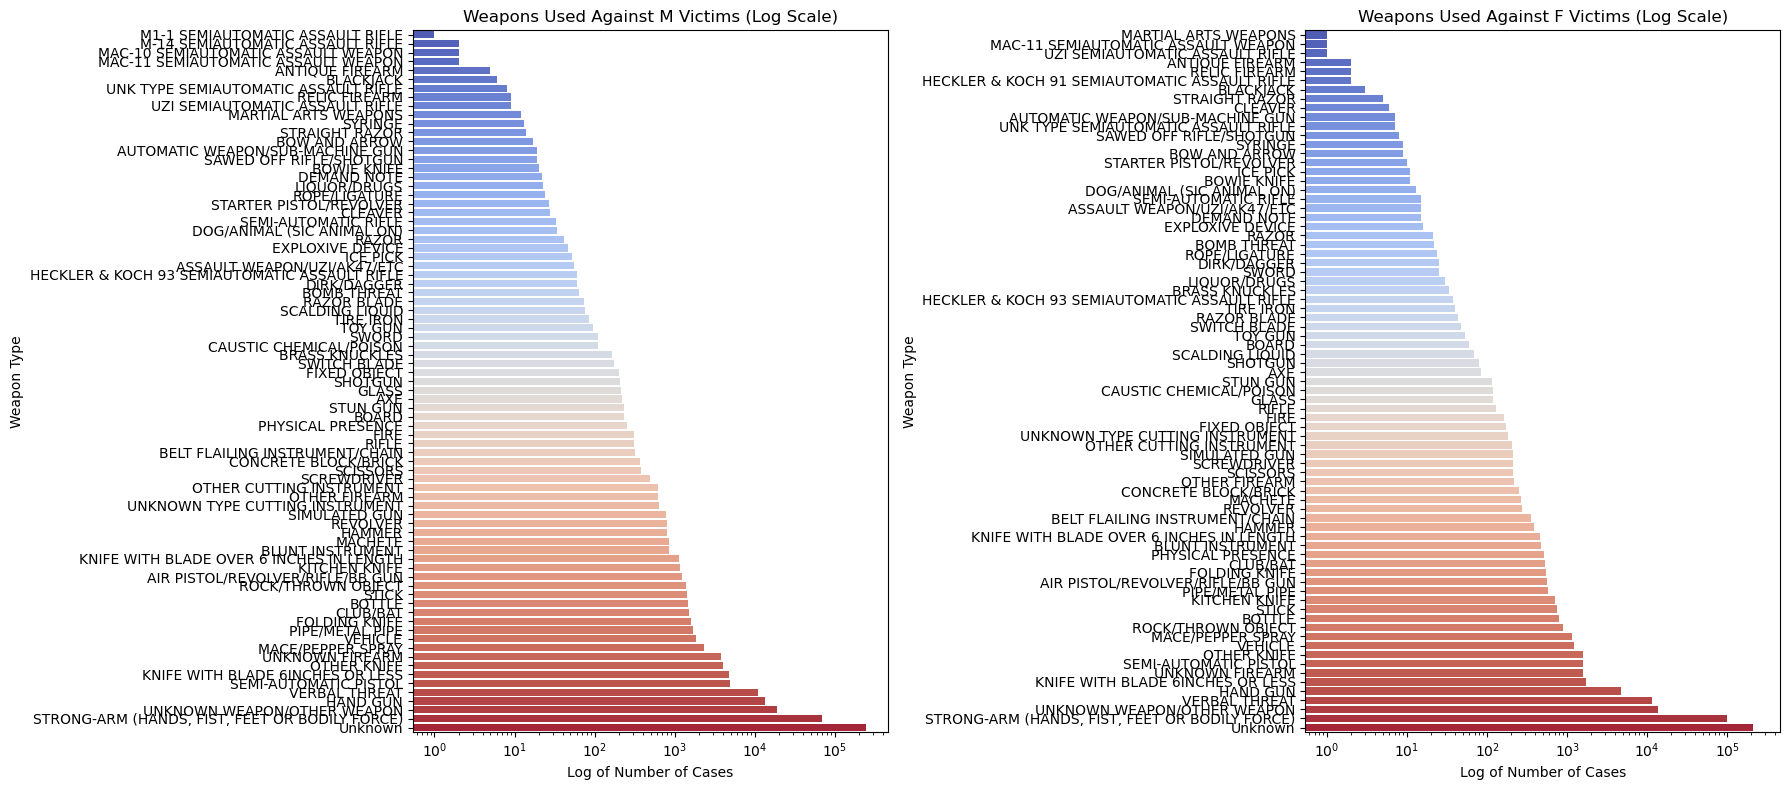

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharex=True)

for i, sex in enumerate(["M", "F"]):
    subset = weapon_analysis[weapon_analysis["Vict Sex"] == sex].sort_values(by="Count", ascending=True)
    
    sns.barplot(
        data=subset, 
        x="Count", 
        y="Weapon Desc", 
        ax=axes[i], 
        palette="coolwarm"
    )
    
    axes[i].set_xscale("log")  # Apply log scale for better visibility
    axes[i].set_title(f"Weapons Used Against {sex} Victims (Log Scale)")
    axes[i].set_xlabel("Log of Number of Cases")
    axes[i].set_ylabel("Weapon Type")

plt.tight_layout()
plt.show()


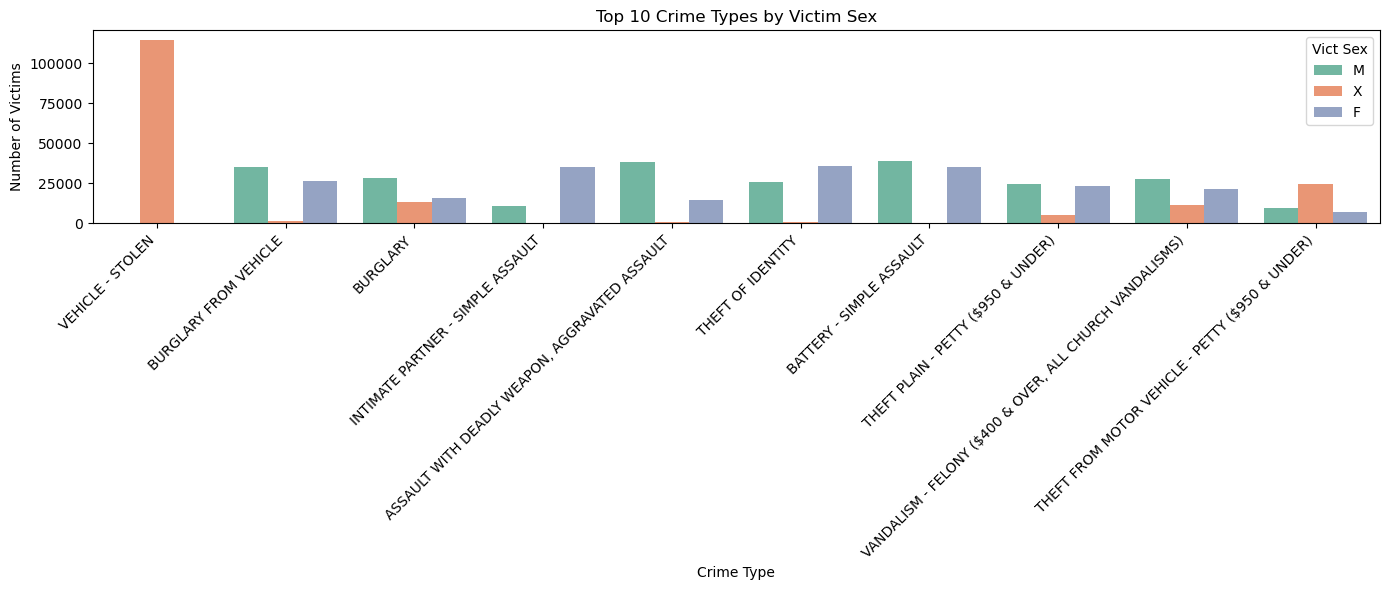

In [34]:
top_crimes = df['Crm Cd Desc'].value_counts().nlargest(10).index
df_top = df[df['Crm Cd Desc'].isin(top_crimes)]

# Plot grouped bar chart
plt.figure(figsize=(14, 6))
sns.countplot(data=df_top, x='Crm Cd Desc', hue='Vict Sex', palette='Set2')
plt.title("Top 10 Crime Types by Victim Sex")
plt.xlabel("Crime Type")
plt.ylabel("Number of Victims")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [35]:
# Count total occurrences of each crime category
top_crimes_overall = df['Crm Cd Desc'].value_counts().head(5)

# Display the result
print("Top 5 Crime Categories:")
print(top_crimes_overall)


Top 5 Crime Categories:
VEHICLE - STOLEN                                           115230
BATTERY - SIMPLE ASSAULT                                    74840
BURGLARY FROM VEHICLE                                       63517
THEFT OF IDENTITY                                           62539
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     61092
Name: Crm Cd Desc, dtype: int64


In [36]:
df.to_csv("cleaned_crime_data.csv", index=False)
print("Cleaned dataset saved as cleaned_crime_data.csv")

Cleaned dataset saved as cleaned_crime_data.csv


#  Crime Hotspot Prediction

In [37]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [53]:
# Load dataset
df_pred = pd.read_csv("cleaned_crime_data.csv")

In [54]:
# Display first few rows
df_pred.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,year,hour,crime_severity
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,998.0,0.0,0.0,1900 S LONGWOOD AV,Unknown,34.0375,-118.3506,2020,21,Low
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,998.0,0.0,0.0,1000 S FLOWER ST,Unknown,34.0444,-118.2628,2020,18,Moderate
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,0.0,0.0,0.0,1400 W 37TH ST,Unknown,34.0210,-118.3002,2020,17,Low
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,0.0,0.0,0.0,14000 RIVERSIDE DR,Unknown,34.1576,-118.4387,2020,20,Low
4,200412582,2020-09-09,2020-09-09,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,0.0,0.0,0.0,200 E AVENUE 28,Unknown,34.0820,-118.2130,2020,6,Low


In [55]:
# Check missing values
df_pred.isnull().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
year              0
hour              0
crime_severity    0
dtype: int64

# Convert time into categorical features

In [56]:
df_pred['Hour'] = df_pred['TIME OCC'] // 100  # Extract hour from military time
df_pred['DayOfWeek'] = pd.to_datetime(df_pred['DATE OCC']).dt.dayofweek  # Monday=0, Sunday=6
df_pred['Year'] = pd.to_datetime(df_pred['DATE OCC']).dt.year

# Encode categorical features (Crime Type, Premises Description, Area Name)

In [57]:
encoder = LabelEncoder()
df_pred['Crime_Type_Encoded'] = encoder.fit_transform(df_pred['Crm Cd Desc'])
df_pred['Area_Encoded'] = encoder.fit_transform(df_pred['AREA NAME'])
df_pred['Premises_Encoded'] = encoder.fit_transform(df_pred['Premis Desc'])

In [58]:
df_pred.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,LON,year,hour,crime_severity,Hour,DayOfWeek,Year,Crime_Type_Encoded,Area_Encoded,Premises_Encoded
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,-118.3506,2020,21,Low,21,6,2020,134,20,266
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,-118.2628,2020,18,Moderate,18,5,2020,21,1,29
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,-118.3002,2020,17,Low,17,2,2020,11,15,207
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,-118.4387,2020,20,Low,20,1,2020,106,17,40
4,200412582,2020-09-09,2020-09-09,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,-118.2130,2020,6,Low,6,2,2020,134,5,266


# Define High-Risk Areas
# If an area has more than X crimes per year → High Risk (1)
# Otherwise → Low Risk (0)

In [59]:
# Create crime frequency count per location
crime_counts = df_pred.groupby(['LAT', 'LON']).size().reset_index(name='Crime_Count')

# Merge with main dataset
df_pred = df_pred.merge(crime_counts, on=['LAT', 'LON'], how='left')

# Define High-Risk Areas (Threshold: 75th percentile)
threshold = df_pred['Crime_Count'].quantile(0.75)
df_pred['High_Risk'] = (df_pred['Crime_Count'] >= threshold).astype(int)

# Drop unnecessary columns
df_model = df_pred[['Hour', 'DayOfWeek', 'Year', 'LAT', 'LON', 
                    'Crime_Type_Encoded', 'Area_Encoded', 'Premises_Encoded', 'High_Risk']]

# Save predictions to a CSV file for Tableau
df_pred[['LAT', 'LON', 'AREA NAME', 'Crime_Count', 'High_Risk']].to_csv("crime_hotspot_predictions.csv", index=False)
print("Predictions saved as crime_hotspot_predictions.csv")

Predictions saved as crime_hotspot_predictions.csv


# Train Machine Learning Models

In [60]:
# Define features (X) and target (y)
X = df_model.drop(columns=['High_Risk'])
y = df_model['High_Risk']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize Latitude & Longitude for better model performance
scaler = StandardScaler()
X_train[['LAT', 'LON']] = scaler.fit_transform(X_train[['LAT', 'LON']])
X_test[['LAT', 'LON']] = scaler.transform(X_test[['LAT', 'LON']])

# Train Random Forest Model


In [61]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate Performance
print("Random Forest Model Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94    150492
           1       0.92      0.68      0.78     50529

    accuracy                           0.90    201021
   macro avg       0.91      0.83      0.86    201021
weighted avg       0.91      0.90      0.90    201021

Accuracy: 0.9044278955929977


# Train XGBoost Model

In [62]:
# Initialize XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Performance
print("XGBoost Model Performance:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Model Performance:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90    150492
           1       0.83      0.44      0.58     50529

    accuracy                           0.84    201021
   macro avg       0.84      0.71      0.74    201021
weighted avg       0.84      0.84      0.82    201021

Accuracy: 0.8370866725367001


# Train Logistic Regression Model

In [63]:
# Initialize Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train model
logreg_model.fit(X_train, y_train)

# Predict on test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate Performance
print("Logistic Regression Model Performance:")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))


Logistic Regression Model Performance:
              precision    recall  f1-score   support

           0       0.75      0.99      0.85    150492
           1       0.46      0.03      0.05     50529

    accuracy                           0.75    201021
   macro avg       0.61      0.51      0.45    201021
weighted avg       0.68      0.75      0.65    201021

Accuracy: 0.7476482556548818


# Visualizing High-Risk Areas on a Map

In [64]:
# Create base map centered around Los Angeles
map_hotspots = folium.Map(location=[34.0522, -118.2437], zoom_start=11)

# Plot High-Risk Areas with Tooltips
for _, row in df_pred[df_pred['High_Risk'] == 1].sample(500).iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=4,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        tooltip=f"Area: {row['AREA NAME']}<br>Crime Count: {row['Crime_Count']}"
    ).add_to(map_hotspots)

# Display Map
map_hotspots


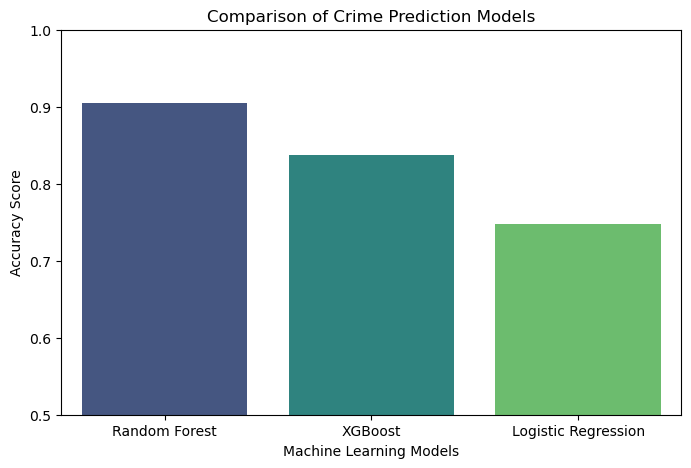

In [65]:
# Compare Model Accuracy
models = ['Random Forest', 'XGBoost', 'Logistic Regression']
accuracies = [accuracy_score(y_test, y_pred_rf), 
              accuracy_score(y_test, y_pred_xgb), 
              accuracy_score(y_test, y_pred_logreg)]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Crime Prediction Models")
plt.ylim(0.5, 1)
plt.show()
